# Assignment- Linear Regression

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.  

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Step-1 Getting and Cleaning Data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting data
cars_data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars_data.shape

(205, 26)

In [5]:
cars_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- The input data set has 25 features (or predictors, input variables) to predict the `price` (which is our target variable or output variable).
- There are no null values in any of the columns

In [6]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
#dropping the column car_ID as it the ID of car and is not relavant for our modelling
cars_data.drop('car_ID',axis=1,inplace=True)

### Step:2 Visualizing data and Data preparation

In [8]:
'''
Symboling is a categorical variable(but it is in numeric type).
Its assigned insurance risk rating. 
A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical).
Dividing to categories:
-> -ve as safe
-> 0, 1 as moderate
-> 2,3 as risky
'''

cars_data['symboling'] = cars_data['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [9]:
'''
The categorical variable CarName is comprised of two parts - the first word is the name of 'car company' 
and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' 
as the car model name. We need to consider only company name as the independent variable for model building.
'''

cars_data['CarName'] = cars_data['CarName'].apply(lambda x: x.split( )[0])

In [10]:
cars_data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
# There are some spelling mistakes, correcting them
cars_data['CarName'].replace('maxda','mazda',inplace=True)
cars_data['CarName'].replace('Nissan','nissan',inplace=True)
cars_data['CarName'].replace('porcshce','porsche',inplace=True)
cars_data['CarName'].replace('toyouta','toyota',inplace=True)
cars_data['CarName'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

#Renaming carname to car company as this field only holds company names
cars_data.rename(columns = {'CarName':'CarCompany'}, inplace = True) 

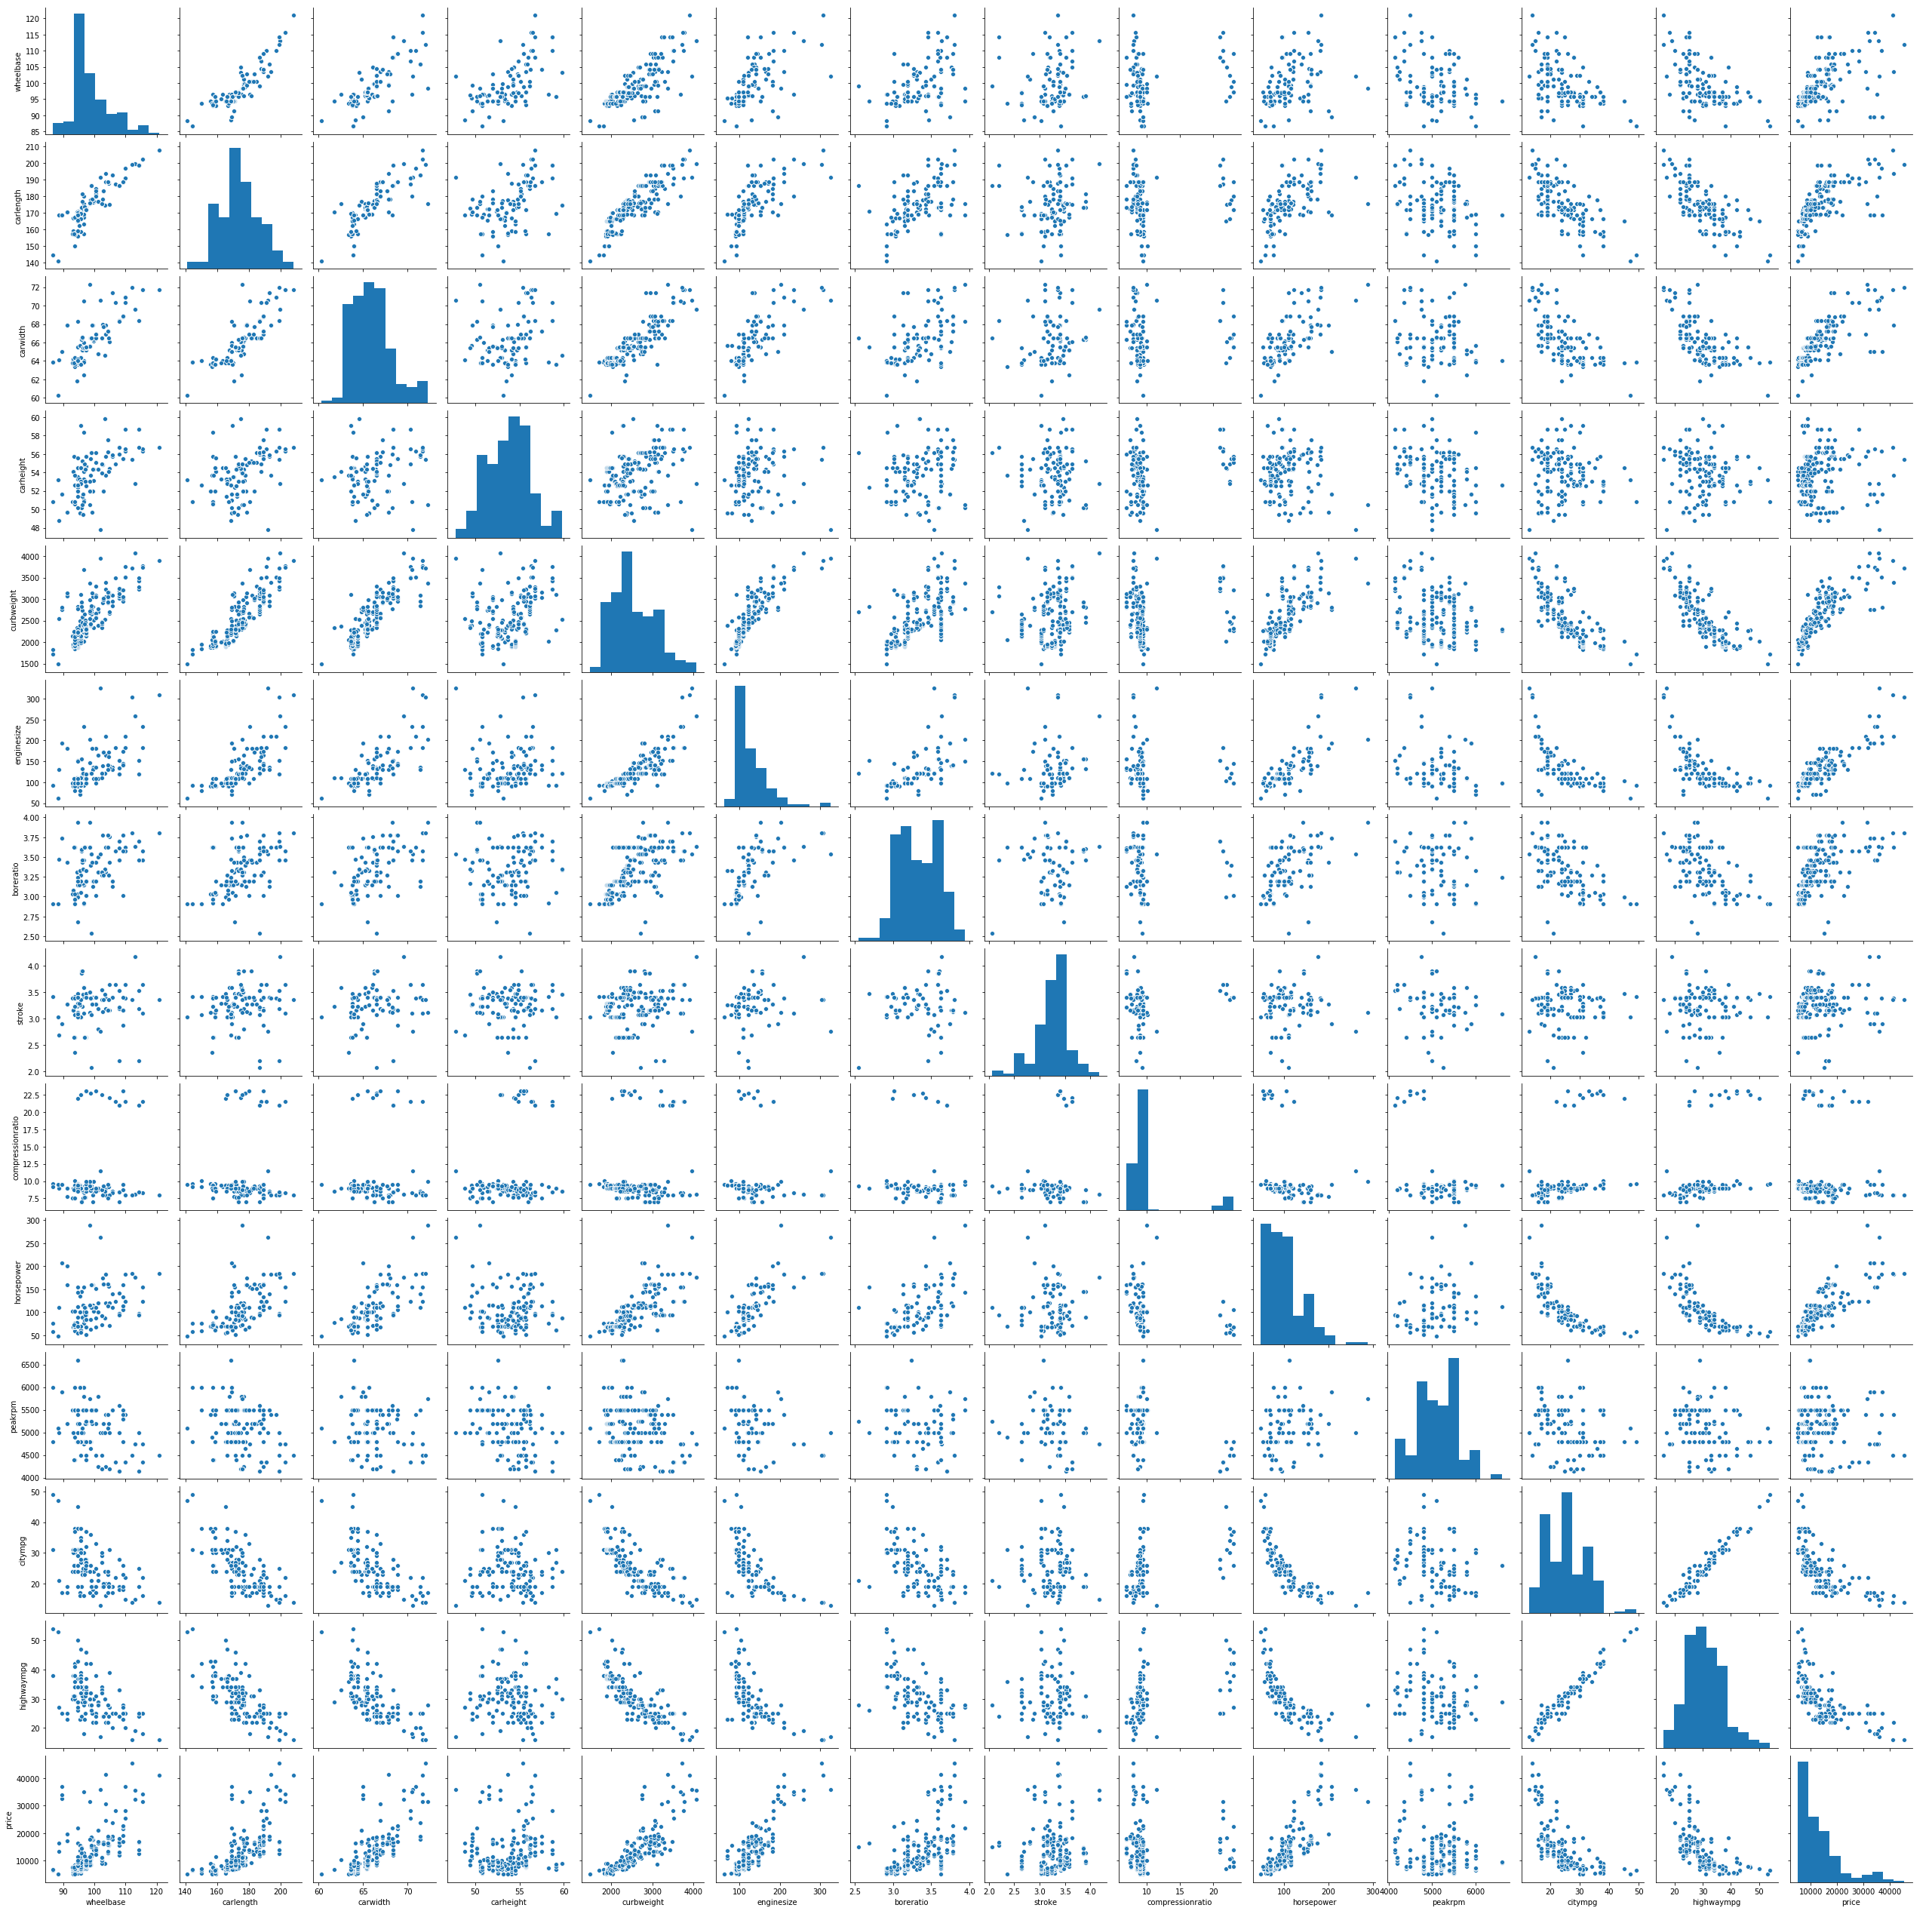

In [12]:
# Plots for numeric variables 
sns.pairplot(cars_data)
plt.show()

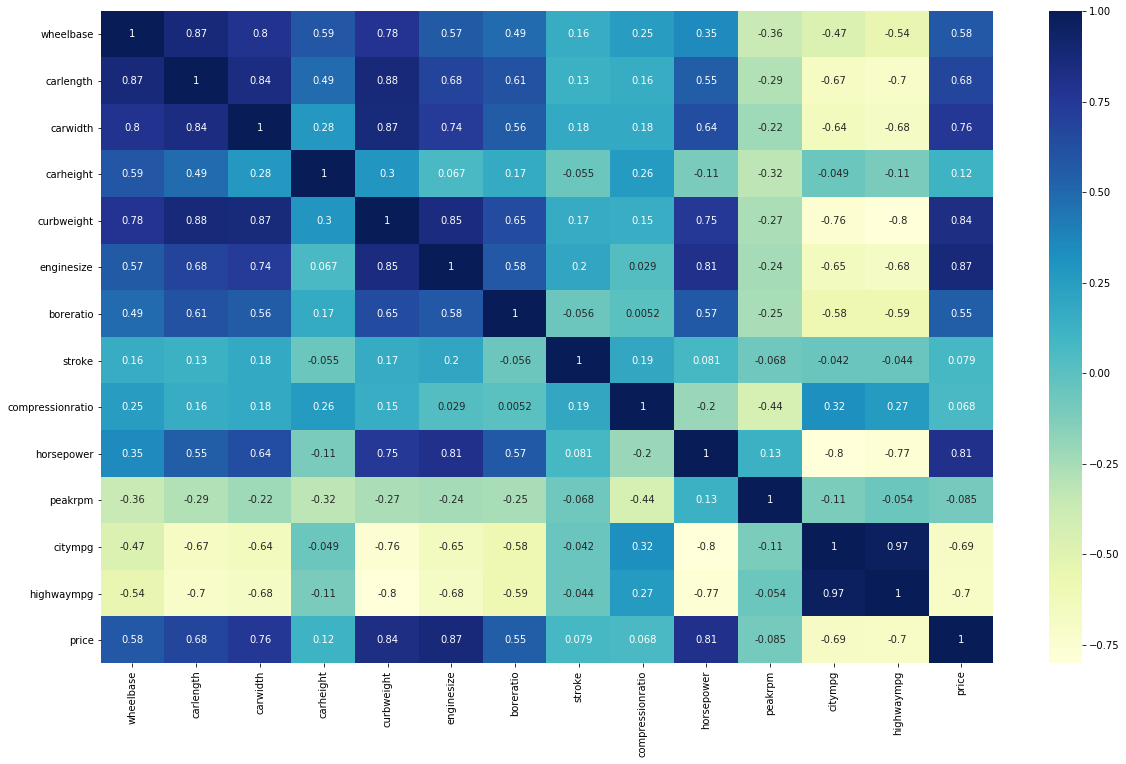

In [13]:
'''
Let's create a heatmap to find the variables which are highly correlated with price. 
This step also tells if there is any multicollinearity between variables
'''

plt.figure(figsize = (20, 12))
corr_matrix=cars_data.corr()
sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
plt.show()

Above heat map explains the relationship between the predictor vraibles and target variable. 

###### Variables which are having high correlation with price
- Wheelbase(positive)
- carlength(positive)
- carwidth(positive)
- curbweight(positive)
- enginesize(positive)
- boreratio(positive)
- horsepower(positive)
- citympg(negative)
- highwaympg(negative)

###### Few variables have relationship among themselves (listed below are some of them)
- carlength and wheelbase
- carlength and carwidth
- wheelbase and carwidth
- enginesize and horsepower
- citympg and highwaympg

etc...

In [14]:
# Visualizing categorial variables against price
cat_vars = list(cars_data.columns[cars_data.dtypes == 'object'])
cat_vars.pop(1)
cat_vars.append("CarCompany")
cat_vars

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CarCompany']

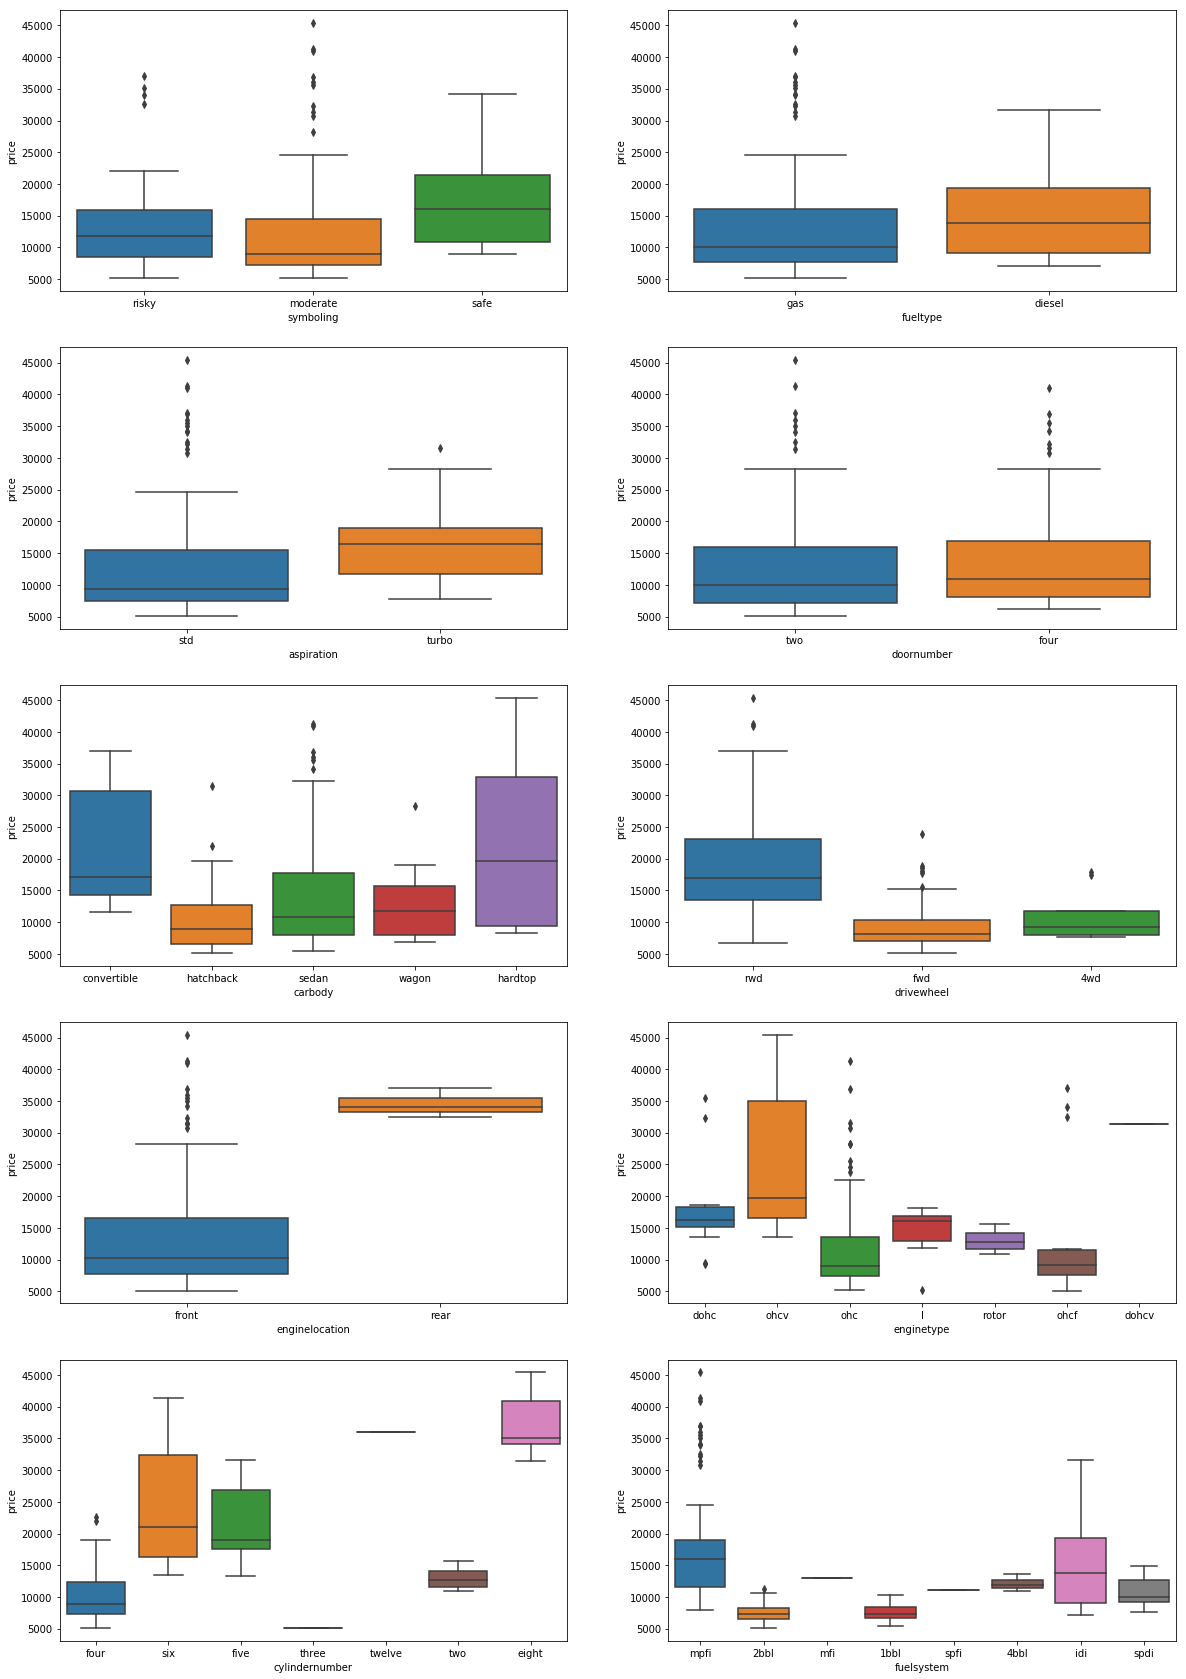

In [15]:
# writing function for box plot for multiple variables
def plot_box_multiple(vars_list):
    plt.figure(figsize = (20, 30))
    for var in vars_list:
        plt.subplot(5,2,vars_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = cars_data)
    plt.show()
plot_box_multiple(cat_vars[:-1])

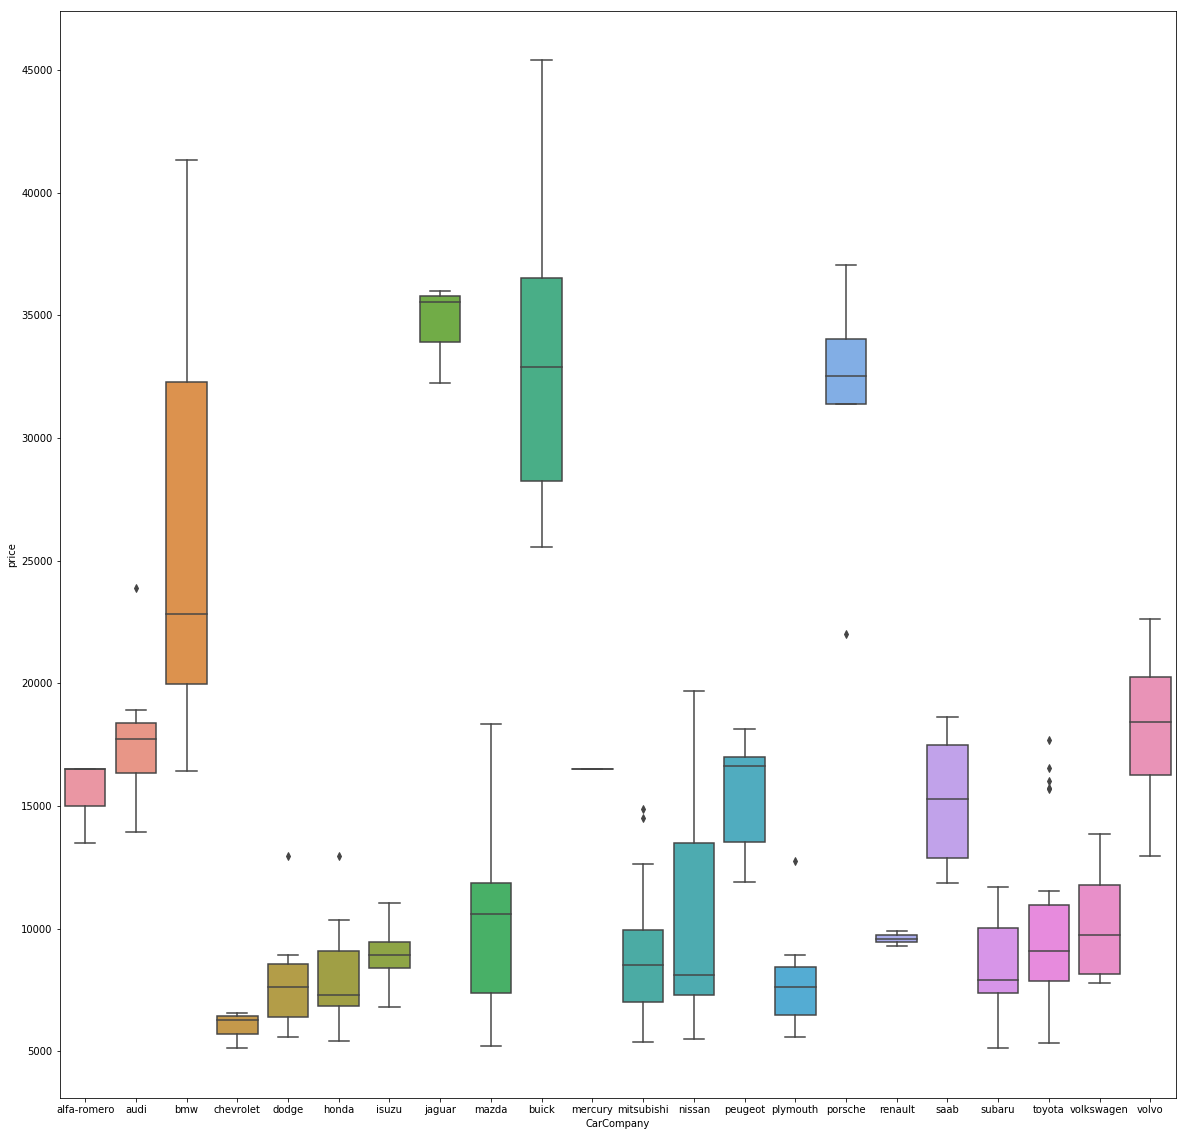

In [16]:
plt.figure(figsize = (20, 20))
sns.boxplot(x = cat_vars[-1], y = 'price', data = cars_data)
plt.show()

###### Categorial variables effect on price

Observations:

- `Symboling`- `Risky` and `moderate` have a similar effect on price, but `safe` is having a good effect on price.
- `fueltype` - Though it's effect on price is similar in `gas` and `diesel` categories, `diesel` seems to be having a bit more effect. We can see this later.
- `aspiration`- It has a visible effect on price
- `doornumber`- It seems to have no effect on price
- `carbody`- Different car-bodies have different range of prices with `covertible` and `hardtop`  having more range than other categories
- `drivewheel` - The price of `rwd` is significantly higher than other drivewheel options.
- `enginelocation`- It has a visible effect on price
- `enginetype` and `cylindernumber`- Different categories have different price range. They have an effect on price.
- `CarCompany`- Few companies sell at low price and few sell at high price. Few companies have outliers which means they few cars at higher price than usual

In [17]:
print('Average price of cars in US: ',cars_data['price'].mean()) # Average selling price of cars across all company
print(cars_data.groupby('CarCompany').price.mean().sort_values(ascending=False).head()) # Average for each company

Average price of cars in US:  13276.710570731706
CarCompany
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


- Average price of cars in US in around $13300

In [18]:
# Dealing with multicollinearity
# highwaympg and citympg are highly collinear (0.97). So taking ratio of citympg and highwaympg
cars_data['citympg_highwaympg_ratio'] = cars_data.citympg/cars_data.highwaympg

# creating new variable boot_capacity (carlength*carwidth*carheight/1000)
cars_data['boot_capacity'] = (cars_data.carlength*cars_data.carwidth*cars_data.carheight)/1000

# dropping original variables
cars_data.drop(['carlength','carwidth', 'carheight', 'highwaympg', 'citympg'],axis=1,inplace=True)

###### Handling categorical variables

In [19]:
# Converting categorical variables with two levels to either 1 or 0
cars_data['fueltype'] = cars_data['fueltype'].map({'gas': 1, 'diesel': 0})
cars_data['aspiration'] = cars_data['aspiration'].map({'std': 1, 'turbo': 0})
cars_data['doornumber'] = cars_data['doornumber'].map({'two': 1, 'four': 0})
cars_data['enginelocation'] = cars_data['enginelocation'].map({'front': 1, 'rear': 0})
cars_data.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,citympg_highwaympg_ratio,boot_capacity
0,risky,alfa-romero,1,1,1,convertible,rwd,1,88.6,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,0.777778,528.019904
1,risky,alfa-romero,1,1,1,convertible,rwd,1,88.6,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,0.777778,528.019904
2,moderate,alfa-romero,1,1,1,hatchback,rwd,1,94.5,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,0.730769,587.592640
3,risky,audi,1,1,0,sedan,fwd,1,99.8,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,0.800000,634.816956
4,risky,audi,1,1,0,sedan,4wd,1,99.4,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,0.818182,636.734832


In [20]:
'''
Let's create a company_tier categorical variable which would 
suggest, under which price tier the respective CarCompany comes under.
We will segment the CarCompany based on the mean company price as

lowtier if company mean price is below 10,000
midtier if company mean price is above 10,000 and below 20,000
hightier if company mean price is above 20,000
'''
cars_data.groupby('CarCompany').price.mean().sort_values(ascending=False)

CarCompany
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [21]:
company_tier_dict = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
cars_data['company_tier'] = cars_data['CarCompany'].map(company_tier_dict)
# Dropping the orignal CarCompany variable
cars_data.drop('CarCompany',axis=1,inplace=True)
cars_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,citympg_highwaympg_ratio,boot_capacity,company_tier
0,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,mpfi,3.47,2.68,9.0,111,5000,13495.0,0.777778,528.019904,midtier
1,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,mpfi,3.47,2.68,9.0,111,5000,16500.0,0.777778,528.019904,midtier
2,moderate,1,1,1,hatchback,rwd,1,94.5,2823,ohcv,...,mpfi,2.68,3.47,9.0,154,5000,16500.0,0.730769,587.592640,midtier
3,risky,1,1,0,sedan,fwd,1,99.8,2337,ohc,...,mpfi,3.19,3.40,10.0,102,5500,13950.0,0.800000,634.816956,midtier
4,risky,1,1,0,sedan,4wd,1,99.4,2824,ohc,...,mpfi,3.19,3.40,8.0,115,5500,17450.0,0.818182,636.734832,midtier


In [22]:
# Creating dummy variables
clean_cars_data = pd.get_dummies(cars_data)
clean_cars_data.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'citympg_highwaympg_ratio',
       'boot_capacity', 'symboling_moderate', 'symboling_risky',
       'symboling_safe', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_tier_hightier',
  

In [23]:
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature 
clean_cars_data.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl'],axis=1,inplace=True)
clean_cars_data.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'citympg_highwaympg_ratio',
       'boot_capacity', 'symboling_moderate', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_tier_hightier', 'company_tier_lowtier',
       'company_tier_midtier'],
      dtype='object')

In [24]:
clean_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fueltype                  205 non-null    int64  
 1   aspiration                205 non-null    int64  
 2   doornumber                205 non-null    int64  
 3   enginelocation            205 non-null    int64  
 4   wheelbase                 205 non-null    float64
 5   curbweight                205 non-null    int64  
 6   enginesize                205 non-null    int64  
 7   boreratio                 205 non-null    float64
 8   stroke                    205 non-null    float64
 9   compressionratio          205 non-null    float64
 10  horsepower                205 non-null    int64  
 11  peakrpm                   205 non-null    int64  
 12  price                     205 non-null    float64
 13  citympg_highwaympg_ratio  205 non-null    float64
 14  boot_capac

Now all the variables are in numeric format. Let's go ahead and build model

### Step-3: Model Building

In [25]:
# Test-train split
cars_train, cars_test = train_test_split(clean_cars_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
# Feature scaling

# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','boot_capacity', 'curbweight', 'enginesize', 'boreratio',
            'stroke','compressionratio','peakrpm','citympg_highwaympg_ratio', 'price']
cars_train[num_vars] = scaler.fit_transform(cars_train[num_vars])

cars_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_tier_hightier,company_tier_lowtier,company_tier_midtier
122,1,1,0,1,0.244828,0.272692,0.139623,0.230159,0.525253,0.15000,...,1,0,0,0,0,0,0,0,1,0
125,1,1,1,1,0.272414,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,1,0,0,1,0,0
166,1,1,1,1,0.272414,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,1,0,0,0,1,0
1,1,1,1,1,0.068966,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,1,0,0,0,0,1
199,1,0,0,1,0.610345,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,1,0,0,0,0,1


In [27]:
cars_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_tier_hightier,company_tier_lowtier,company_tier_midtier
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.440559,0.993007,0.411141,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.118881,0.447552,0.412587
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.324786,0.498989,0.494030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.341379,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.559542,0.301887,0.682540,0.611111,0.150000,...,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


- Now we have all numeric variables scaled between 0 and 1
- Dividing into X and Y sets for the model building

In [28]:
cars_y_train = cars_train.pop('price')
cars_X_train = cars_train

- Now we have to select features. We will use RFE provided by sklearn for selecting features.
- Then we use the statsmodel for see the statistics and remove the insignificant features

In [29]:
cars_lm = LinearRegression()
cars_lm.fit(cars_X_train, cars_y_train)

cars_rfe = RFE(cars_lm, 15)             # running RFE and selecting 15 features best describing the price of cars
cars_rfe = cars_rfe.fit(cars_X_train, cars_y_train)
list(zip(cars_X_train.columns,cars_rfe.support_,cars_rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', False, 10),
 ('doornumber', False, 21),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 6),
 ('citympg_highwaympg_ratio', False, 9),
 ('boot_capacity', False, 14),
 ('symboling_moderate', False, 27),
 ('symboling_safe', False, 13),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 16),
 ('carbody_sedan', False, 28),
 ('carbody_wagon', False, 15),
 ('drivewheel_fwd', False, 17),
 ('drivewheel_rwd', False, 26),
 ('enginetype_dohc', False, 20),
 ('enginetype_dohcv', True, 1),
 ('enginetype_ohc', False, 5),
 ('enginetype_ohcf', False, 7),
 ('enginetype_ohcv', False, 11),
 ('enginetype_rotor', False, 22),
 ('cylindernumber_eight', False, 3),
 ('cylindernumber_five', False, 4),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindern

In [30]:
cars_15_cols = cars_X_train.columns[cars_rfe.support_]
cars_15_cols

Index(['fueltype', 'enginelocation', 'wheelbase', 'curbweight', 'enginesize',
       'boreratio', 'compressionratio', 'horsepower', 'carbody_convertible',
       'enginetype_dohcv', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'fuelsystem_idi', 'company_tier_hightier'],
      dtype='object')

- Now we got out best 15 variables selected by RFE. We use these variables and using statsmodel, we can remove the insignificant variables.

In [31]:
# Creating X_test dataframe with RFE selected variables
cars_X_train_rfe = cars_X_train[cars_15_cols]

In [32]:
cars_X_train_rfe.head()

,fueltype,enginelocation,wheelbase,curbweight,enginesize,boreratio,compressionratio,horsepower,carbody_convertible,enginetype_dohcv,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,fuelsystem_idi,company_tier_hightier
122,1,1,0.244828,0.272692,0.139623,0.230159,0.15000,0.083333,0,0,1,0,0,0,0
125,1,1,0.272414,0.500388,0.339623,1.000000,0.15625,0.395833,0,0,1,0,0,0,1
166,1,1,0.272414,0.314973,0.139623,0.444444,0.15000,0.266667,0,0,1,0,0,0,0
1,1,1,0.068966,0.411171,0.260377,0.626984,0.12500,0.262500,1,0,1,0,0,0,0
199,1,1,0.610345,0.647401,0.260377,0.746032,0.03125,0.475000,0,0,1,0,0,0,0


In [33]:
# function to create model usig statsmodel
def fit_lr(X_train, y_train):
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary()) # prints summary statistics
    return lm

#function to calculate VIF of model
def calc_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    
def remove_column_and_remodel(X_train, y_train, column):
    X_train.drop(column, axis=1, inplace=True)
    return fit_lr(X_train, y_train)

In [34]:
cars_model = fit_lr(cars_X_train_rfe, cars_y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.93e-68
Time:                        23:04:40   Log-Likelihood:                 210.77
No. Observations:                 143   AIC:                            -391.5
Df Residuals:                     128   BIC:                            -347.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

- There are few features which have high p-value.
- Let's see the VIF of these features


In [35]:
calc_vif(cars_X_train_rfe)

,Features,VIF
0,fueltype,260.49
13,fuelsystem_idi,132.25
6,compressionratio,61.15
3,curbweight,15.38
7,horsepower,10.84
4,enginesize,10.40
2,wheelbase,5.16
11,cylindernumber_six,3.42
10,cylindernumber_four,3.21
12,cylindernumber_twelve,3.04


- Variable `enginesize` is having high VIF and high p-value. So removing the variable and remodelling

In [36]:
remove_column_and_remodel(cars_X_train_rfe, cars_y_train, "enginesize")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     138.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.09e-69
Time:                        23:04:40   Log-Likelihood:                 210.52
No. Observations:                 143   AIC:                            -393.0
Df Residuals:                     129   BIC:                            -351.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

In [37]:
# calc VIF
calc_vif(cars_X_train_rfe)

,Features,VIF
0,fueltype,260.25
12,fuelsystem_idi,131.16
5,compressionratio,60.53
3,curbweight,13.50
6,horsepower,10.61
2,wheelbase,5.15
9,cylindernumber_four,3.14
10,cylindernumber_six,2.68
4,boreratio,2.38
11,cylindernumber_twelve,2.37


- After removing `enginesize`, there isn't much change in r2 value.
- Variable `fuelsystem_idi` is having high VIF and high p-value. So removing the variable and remodelling

In [38]:
remove_column_and_remodel(cars_X_train_rfe, cars_y_train, "fuelsystem_idi")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     138.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.09e-69
Time:                        23:04:40   Log-Likelihood:                 210.52
No. Observations:                 143   AIC:                            -393.0
Df Residuals:                     129   BIC:                            -351.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [39]:
# calc VIF
calc_vif(cars_X_train_rfe)

,Features,VIF
1,enginelocation,149.63
0,fueltype,103.97
3,curbweight,63.28
2,wheelbase,25.82
6,horsepower,25.40
4,boreratio,15.95
5,compressionratio,14.59
9,cylindernumber_four,10.91
10,cylindernumber_six,2.84
12,company_tier_hightier,2.05


- After removing `fuelsystem_idi`, there isn't much change in r2 value.
- Variable `boreratio` is having high VIF and high p-value. So removing the variable and remodelling

In [40]:
remove_column_and_remodel(cars_X_train_rfe, cars_y_train, "boreratio")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     150.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.87e-70
Time:                        23:04:40   Log-Likelihood:                 210.07
No. Observations:                 143   AIC:                            -394.1
Df Residuals:                     130   BIC:                            -355.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.03

In [41]:
# calc VIF
calc_vif(cars_X_train_rfe)

,Features,VIF
1,enginelocation,143.62
0,fueltype,100.37
3,curbweight,58.99
2,wheelbase,25.80
5,horsepower,24.20
4,compressionratio,14.04
8,cylindernumber_four,9.27
9,cylindernumber_six,2.74
11,company_tier_hightier,2.03
7,enginetype_dohcv,1.77


- After removing `boreratio`, there isn't much change in r2 value.
- Variable `fueltype` is having high VIF and high p-value. So removing the variable and remodelling

In [42]:
remove_column_and_remodel(cars_X_train_rfe, cars_y_train, "fueltype")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.59e-71
Time:                        23:04:41   Log-Likelihood:                 209.43
No. Observations:                 143   AIC:                            -394.9
Df Residuals:                     131   BIC:                            -359.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [43]:
# calc VIF
calc_vif(cars_X_train_rfe)

,Features,VIF
2,curbweight,56.65
1,wheelbase,25.76
4,horsepower,22.34
0,enginelocation,20.17
7,cylindernumber_four,8.52
8,cylindernumber_six,2.61
3,compressionratio,2.53
10,company_tier_hightier,1.93
6,enginetype_dohcv,1.75
9,cylindernumber_twelve,1.43


- After removing `fueltype`, there isn't much change in r2 value.
- As you can observe, after removing `fueltype`, there is a drastic change of VIF and p-values of some of the variables
- Variable `curbweight` is having high VIF and high p-value. So removing the variable and remodelling

In [44]:
remove_column_and_remodel(cars_X_train_rfe, cars_y_train, "curbweight")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.09e-71
Time:                        23:04:41   Log-Likelihood:                 207.82
No. Observations:                 143   AIC:                            -393.6
Df Residuals:                     132   BIC:                            -361.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [45]:
# calc VIF
calc_vif(cars_X_train_rfe)

,Features,VIF
0,enginelocation,20.17
3,horsepower,9.81
1,wheelbase,9.46
6,cylindernumber_four,8.47
7,cylindernumber_six,2.59
2,compressionratio,2.19
9,company_tier_hightier,1.91
5,enginetype_dohcv,1.57
8,cylindernumber_twelve,1.42
4,carbody_convertible,1.17


- After removing `curbweight`, there isn't much change in r2 value.
- As you can observe, after removing `curbweight`, there is a drastic change of VIF and p-values of some of the variables
- Variable `cylindernumber_twelve` is having high p-value. So removing the variable and remodelling

In [46]:
remove_column_and_remodel(cars_X_train_rfe, cars_y_train, "cylindernumber_twelve")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     195.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.42e-72
Time:                        23:04:41   Log-Likelihood:                 206.89
No. Observations:                 143   AIC:                            -393.8
Df Residuals:                     133   BIC:                            -364.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [47]:
# calc VIF
calc_vif(cars_X_train_rfe)

,Features,VIF
0,enginelocation,20.13
1,wheelbase,8.92
6,cylindernumber_four,8.45
3,horsepower,7.74
7,cylindernumber_six,2.26
2,compressionratio,2.13
8,company_tier_hightier,1.88
5,enginetype_dohcv,1.41
4,carbody_convertible,1.14


- After removing `cylindernumber_twelve`, there isn't much change in r2 value.
- Variable `cylindernumber_six` is having high p-value. So removing the variable and remodelling

In [48]:
remove_column_and_remodel(cars_X_train_rfe, cars_y_train, "cylindernumber_six")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     218.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.89e-73
Time:                        23:04:41   Log-Likelihood:                 205.84
No. Observations:                 143   AIC:                            -393.7
Df Residuals:                     134   BIC:                            -367.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [49]:
# calc VIF
calc_vif(cars_X_train_rfe)

,Features,VIF
0,enginelocation,19.08
1,wheelbase,8.91
3,horsepower,6.96
6,cylindernumber_four,6.96
2,compressionratio,2.13
7,company_tier_hightier,1.88
5,enginetype_dohcv,1.28
4,carbody_convertible,1.12


- After removing `cylindernumber_six`, there isn't much change in r2 value.
- Variable `enginelocation` is having high VIF. So removing the variable and remodelling

In [50]:
remove_column_and_remodel(cars_X_train_rfe, cars_y_train, "enginelocation")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     238.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.02e-72
Time:                        23:04:42   Log-Likelihood:                 202.28
No. Observations:                 143   AIC:                            -388.6
Df Residuals:                     135   BIC:                            -364.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [51]:
# calc VIF
calc_vif(cars_X_train_rfe)

,Features,VIF
0,wheelbase,7.42
2,horsepower,4.98
5,cylindernumber_four,2.44
1,compressionratio,2.09
6,company_tier_hightier,1.87
4,enginetype_dohcv,1.27
3,carbody_convertible,1.11


 - After removing `enginelocation`, there isn't much change in r2 value.
 - Removing `wheelbase` or `horsepower` is reducing r2 value by large amount. 
 - So removing `cylindernumber_four` variable and remodelling to see if there is any change in VIF of `wheelbase`

In [52]:
remove_column_and_remodel(cars_X_train_rfe, cars_y_train, "cylindernumber_four")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     261.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.40e-72
Time:                        23:04:42   Log-Likelihood:                 197.73
No. Observations:                 143   AIC:                            -381.5
Df Residuals:                     136   BIC:                            -360.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

In [53]:
# calc VIF
calc_vif(cars_X_train_rfe)

,Features,VIF
0,wheelbase,5.83
2,horsepower,4.97
1,compressionratio,2.08
5,company_tier_hightier,1.54
4,enginetype_dohcv,1.27
3,carbody_convertible,1.07


 - After removing `cylindernumber_four`, there isn't much change in r2 value.
 - Removing `wheelbase` or `horsepower` is reducing r2 value by large amount. 
 - So removing `compressionratio` variable and remodelling to see if there is any change in VIF of `wheelbase`

In [54]:
remove_column_and_remodel(cars_X_train_rfe, cars_y_train, "compressionratio")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     281.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.61e-70
Time:                        23:04:42   Log-Likelihood:                 190.05
No. Observations:                 143   AIC:                            -368.1
Df Residuals:                     137   BIC:                            -350.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [55]:
# calc VIF
calc_vif(cars_X_train_rfe)

,Features,VIF
1,horsepower,4.47
0,wheelbase,3.56
4,company_tier_hightier,1.53
3,enginetype_dohcv,1.24
2,carbody_convertible,1.06


 - All variables are having low VIF (<5) and low p-value(<0.05).
 - The model is having `r2 value = 0.911` and `Adjusted r2-value = 0.908` which tells the model is a significant fit.
 - So, concluding that these variables are the final model predictor variables.

In [56]:
# So our model is cars_model (putting final model in a variable)
cars_X_train_rfe = sm.add_constant(cars_X_train_rfe)
cars_model = sm.OLS(cars_y_train,cars_X_train_rfe).fit()
cars_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     281.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.61e-70
Time:                        23:04:42   Log-Likelihood:                 190.05
No. Observations:                 143   AIC:                            -368.1
Df Residuals:                     137   BIC:                            -350.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0906      0.014     -6.502      0.000      -0.118      -0.063
wheelbase                 0.3172      0.031     10.183      0.000       0.256       0.379
horsepower                0.6295      0.044     14.256      0.000       0.542       0.717
carbody_convertible       0.1685      0.034      4.894      0.000       0.100       0.237
enginetype_dohcv         -0.2213      0.073     -3.031      0.003      -0.366      -0.077
company_tier_hightier     0.2794      0.021     13.341      0.000       0.238       0.321
==============================================================================
Omnibus:                       29.964   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.005
Skew:                           0.942   Prob(JB):                     4.18e-13
Kurtosis:                       5.453   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step-4: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [57]:
cars_y_train_price = cars_model.predict(cars_X_train_rfe)

Text(0.5, 0, 'Errors')

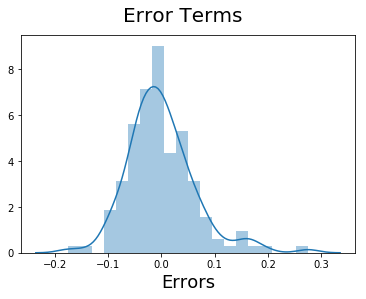

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((cars_y_train - cars_y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- From above plot, we can say that, it is a good normal distribution with mean at zero. So we can conclude that the assumptions of the linear regression are met. 

### Step-5: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model (`cars_model`).

In [59]:
num_vars = ['horsepower','wheelbase','boot_capacity', 'curbweight', 'enginesize', 'boreratio',
            'stroke','compressionratio','peakrpm','citympg_highwaympg_ratio', 'price']

# Applying the scaling on the test sets
cars_test[num_vars] = scaler.transform(cars_test[num_vars])

In [60]:
cars_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_tier_hightier,company_tier_lowtier,company_tier_midtier
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.435484,0.967742,0.437764,0.428470,0.265673,0.556580,0.544314,0.209375,...,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.112903,0.451613,0.435484
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.179488,0.162820,0.228484,0.160738,0.273690,...,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.319058,0.501716,0.499868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.128394,0.067925,-0.111111,-0.060606,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.313793,0.305275,0.177358,0.404762,0.484848,0.093750,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.387931,0.406129,0.226415,0.563492,0.585859,0.125000,...,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.570690,0.564876,0.316038,0.746032,0.641414,0.150000,...,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.182759,0.935609,0.932075,0.888889,0.863636,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Dividing into X_test and y_test

In [61]:
cars_y_test = cars_test.pop('price')
cars_X_test = cars_test

In [62]:
# Adding constant variable to test dataframe
cars_X_test = sm.add_constant(cars_X_test)

In [63]:
# Dropping columns in cars_X_test
cars_X_test = cars_X_test[cars_X_train_rfe.columns]

In [64]:
# Making predictions
cars_y_pred = cars_model.predict(cars_X_test)

### Step-6: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'cars_y_pred')

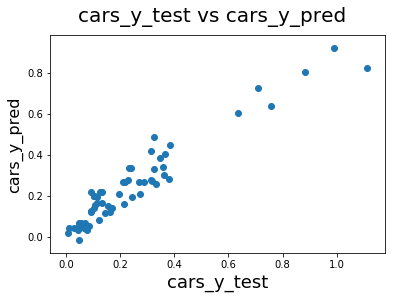

In [65]:
fig = plt.figure()
plt.scatter(cars_y_test, cars_y_pred)
fig.suptitle('cars_y_test vs cars_y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('cars_y_test', fontsize = 18)                          # X-label
plt.ylabel('cars_y_pred', fontsize = 16)

Though there is very little variance at the higher values, y_test VS y_pred have a good linear relationship.

In [66]:
from sklearn.metrics import r2_score
r2_score(cars_y_test, cars_y_pred)

0.9080025538886396

### Final Analysis

- We have made a good model and the assumptions are also met
- We have variables which have low p-value and low VIF. These variables are significant for determination of price.
- These are listed below

|Features|VIF|p-value|
|--------|---|-------|
|horsepower|4.47|0|
|wheelbase|3.56|0|
|company_tier_hightier|1.53|0|
|enginetype_dohcv|1.24|0.003|
|carbody_convertible|1.06|0|

We can see that the equation of our best fitted line is:

**price = -0.0906 + 0.3127 x wheelbase + 0.6295 x horsepower + 0.1685 x carbody_convertible - 0.2213 x enginetype_dohcv + 0.2794 x company_tier_hightier**


The statistics of the above model are:

**r2_value = 0.911**

**adjusted r2_value = 0.908**

From above equation we can say the effect of each variables, when all the other variables are kept constant

- Price changes by 0.3127 units for a unit change for wheelbase when all the other variables are kept constant
- Similarly we can say for other variables